In [1]:
from LineSplit import LineSplit
from WordSplit import WordSplit
from nltk.translate.bleu_score import sentence_bleu

In [2]:
# check files

files = ['summary_worldwar2.txt', 'Ref_WorldWar2_sir.txt', 'Ref_WorldWar2_mihir.txt', 'Ref_WorldWar2_chandni.txt', 'Ref_WorldWar2_sweta.txt']

for file in files:
    print(f"Lines Count {file}: ", len(LineSplit(file)))

Lines Count summary_worldwar2.txt:  13
Lines Count Ref_WorldWar2_sir.txt:  13
Lines Count Ref_WorldWar2_mihir.txt:  13
Lines Count Ref_WorldWar2_chandni.txt:  13
Lines Count Ref_WorldWar2_sweta.txt:  13


In [3]:
conf_matrix = []

In [4]:
for ref in files:
    refList = WordSplit(LineSplit(ref))
    row = []
    for can in files:
        canList = WordSplit(LineSplit(can))
        
        refListCopy = refList.copy()
        canFinal = []
        refFinal = []
        
        for item in canList:
            if item in refListCopy:
                canFinal.append(item)
                refFinal.append(item)
                canList.remove(item)
                refListCopy.remove(item)

        canFinal += canList
        refFinal += refListCopy
        
        row.append(sentence_bleu([refFinal], canFinal))
    conf_matrix.append(row)

In [5]:
conf_matrix

[[1.0,
  0.599294577739709,
  0.5379940639011361,
  0.6416131866920198,
  0.3445950785019197],
 [0.6032987129124568,
  1.0,
  0.5262855131852601,
  0.5488361336498744,
  0.291129966078911],
 [0.5151112746596568,
  0.5137850780483116,
  1.0,
  0.593640816840417,
  0.28609234030539615],
 [0.6418187696176822,
  0.5507178152856577,
  0.6064559722144742,
  1.0,
  0.29434836472432346],
 [0.3823353546983135,
  0.3410468925153135,
  0.34199045243015075,
  0.33680636985276996,
  1.0]]

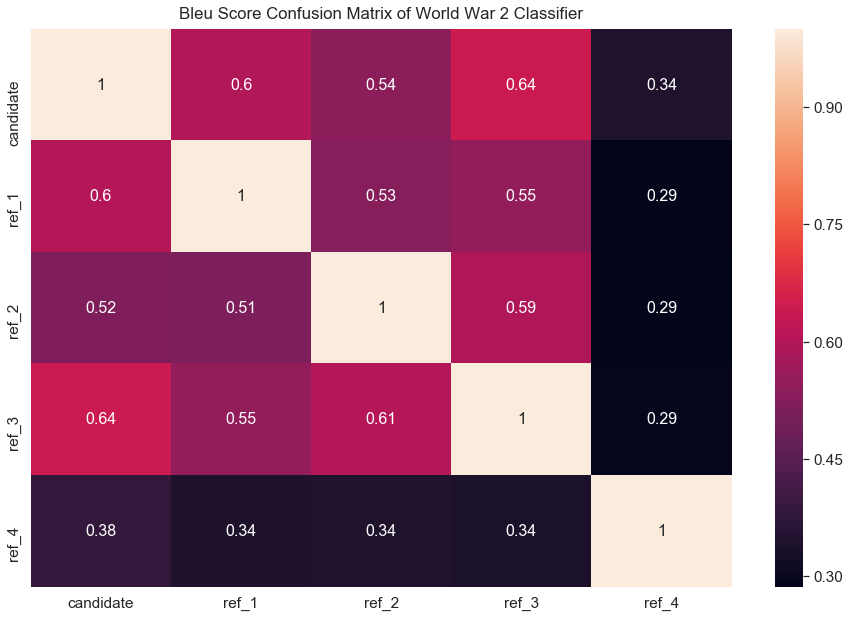

In [7]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

# ['candidate', 'ref_sir','ref_mihir', ref_chandni', 'ref_sweta']
df_cm = pd.DataFrame(conf_matrix, index = ['candidate', 'ref_1', 'ref_2', 'ref_3', 'ref_4'],
                  columns = ['candidate', 'ref_1', 'ref_2', 'ref_3', 'ref_4'])


sn.set(rc={'figure.figsize':(15.7,10.27)})
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
plt.title(label="Bleu Score Confusion Matrix of World War 2 Classifier", pad=10.0)
plt.savefig('confusion_bleu_worldwar2.png')
plt.show()